In [ ]:
!pip install --upgrade tensorflow matplotlib seaborn

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model

import matplotlib.pyplot as plt
import numpy as np
import os
import seaborn as sns
import pandas as pd
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from PIL import Image


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.9/644.9 MB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 105.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 111.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 113.7 MB/s eta 0:00:00
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.4.1
    Uninstalling ml-dtypes-0.4.1:
      Successfully uninstalled ml-dtypes-0.4.1
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.18.0
    Uninstalling tensorboard-2.18.0:
      Successfully uninstalled tensorboard-2.18.0
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.10.0
    Uninstalling matplotlib-3.10.0:
      Successfully uninstalled matplotlib-3.10.0
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.18.0
    Uninstalling tensorflow-2.18.0:
      Successfully uninstalled tensorflow-2.18.0
ERROR

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

train_dir = '/content/drive/MyDrive/GRAVITY SPY DATASET/train/train/'
validation_dir = '/content/drive/MyDrive/GRAVITY SPY DATASET/validation/validation/'
test_dir = '/content/drive/MyDrive/GRAVITY SPY DATASET/test/test/'


Mounted at /content/drive


In [ ]:
img_dim = 250  # Input image size

# Automatically extract class names
classes_list = sorted(os.listdir(train_dir))

train_datagen = ImageDataGenerator(rescale=1. / 255)
val_datagen = ImageDataGenerator(rescale=1. / 255)
test_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_dim, img_dim),
    batch_size=64,
    class_mode='categorical',
    shuffle=True,
    seed=123
)

validation_generator = val_datagen.flow_from_directory(
    validation_dir,
    target_size=(img_dim, img_dim),
    batch_size=32,
    class_mode='categorical',
    shuffle=True,
    seed=123
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_dim, img_dim),
    batch_size=1,
    class_mode='categorical',
    shuffle=False
)

test_size = len(test_generator.filenames)


Found 22369 images belonging to 22 classes.
Found 4807 images belonging to 22 classes.
Found 4727 images belonging to 22 classes.


In [ ]:
input_shape = (img_dim, img_dim, 3)

model = Sequential([
    Conv2D(32, (10, 10), activation='relu', input_shape=input_shape),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    Conv2D(32, (5, 5), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    Flatten(),
    Dense(img_dim, activation="relu"),
    Dropout(0.25),
    Dense(len(classes_list), activation="softmax")
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

history = model.fit(
    train_generator,
    steps_per_epoch=32,
    epochs=20,
    validation_data=validation_generator,
    validation_steps=32,
    verbose=1
)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 879s 27s/step - accuracy: 0.1572 - loss: 4.3716 - val_accuracy: 0.4180 - val_loss: 2.2711
Epoch 2/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 703s 23s/step - accuracy: 0.5385 - loss: 1.7858 - val_accuracy: 0.6416 - val_loss: 1.2249
Epoch 3/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 590s 19s/step - accuracy: 0.6681 - loss: 1.2357 - val_accuracy: 0.7451 - val_loss: 0.9923
Epoch 4/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 487s 16s/step - accuracy: 0.7910 - loss: 0.8084 - val_accuracy: 0.8252 - val_loss: 0.7206
Epoch 5/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 368s 12s/step - accuracy: 0.8254 - loss: 0.6571 - val_accuracy: 0.8770 - val_loss: 0.5146
Epoch 6/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 333s 11s/step - accuracy: 0.8648 - loss: 0.5006 - val_accuracy: 0.8877 - val_loss: 0.4161
Epoch 7/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 316s 10s/step - accuracy: 0.8569 - loss: 0.4952 - val_accuracy: 0.9004 - val_loss: 0.4195
Epoch 8/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 289s 9s/step - accuracy: 0.8668 - loss: 0.4895 - val_accuracy: 0.9

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


32/32 ━━━━━━━━━━━━━━━━━━━━ 219s 7s/step - accuracy: 0.8971 - loss: 0.3231 - val_accuracy: 0.9082 - val_loss: 0.3097
Epoch 12/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 264s 8s/step - accuracy: 0.9180 - loss: 0.2943 - val_accuracy: 0.9258 - val_loss: 0.2726
Epoch 13/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 219s 7s/step - accuracy: 0.9064 - loss: 0.3498 - val_accuracy: 0.9189 - val_loss: 0.3266
Epoch 14/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 201s 6s/step - accuracy: 0.9179 - loss: 0.2952 - val_accuracy: 0.9307 - val_loss: 0.2584
Epoch 15/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 167s 5s/step - accuracy: 0.9132 - loss: 0.2882 - val_accuracy: 0.9082 - val_loss: 0.2808
Epoch 16/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 174s 5s/step - accuracy: 0.9308 - loss: 0.2308 - val_accuracy: 0.9346 - val_loss: 0.2569
Epoch 17/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 164s 5s/step - accuracy: 0.9156 - loss: 0.2605 - val_accuracy: 0.9326 - val_loss: 0.2344
Epoch 18/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 186s 6s/step - accuracy: 0.9301 - loss: 0.2451 - val_accuracy: 0.9316 - val_l

In [ ]:
model_save_path = '/content/drive/MyDrive/Classifier/real_only_model.h5'
model.save(model_save_path)
print(f" Model saved to: {model_save_path}")

 Model saved to: /content/drive/MyDrive/Classifier/real_only_model.h5


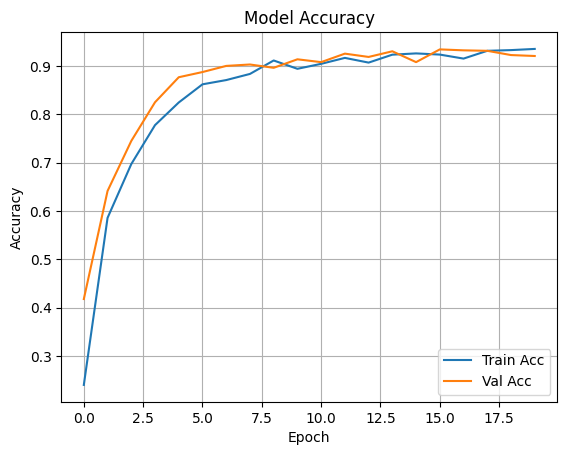

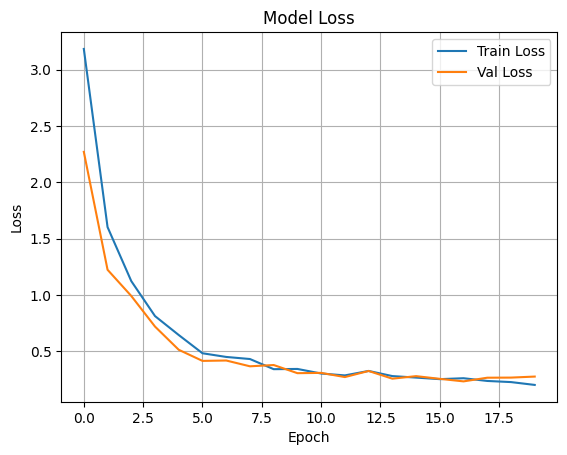

In [ ]:
# Accuracy plot
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Loss plot
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


4727/4727 ━━━━━━━━━━━━━━━━━━━━ 1455s 308ms/step


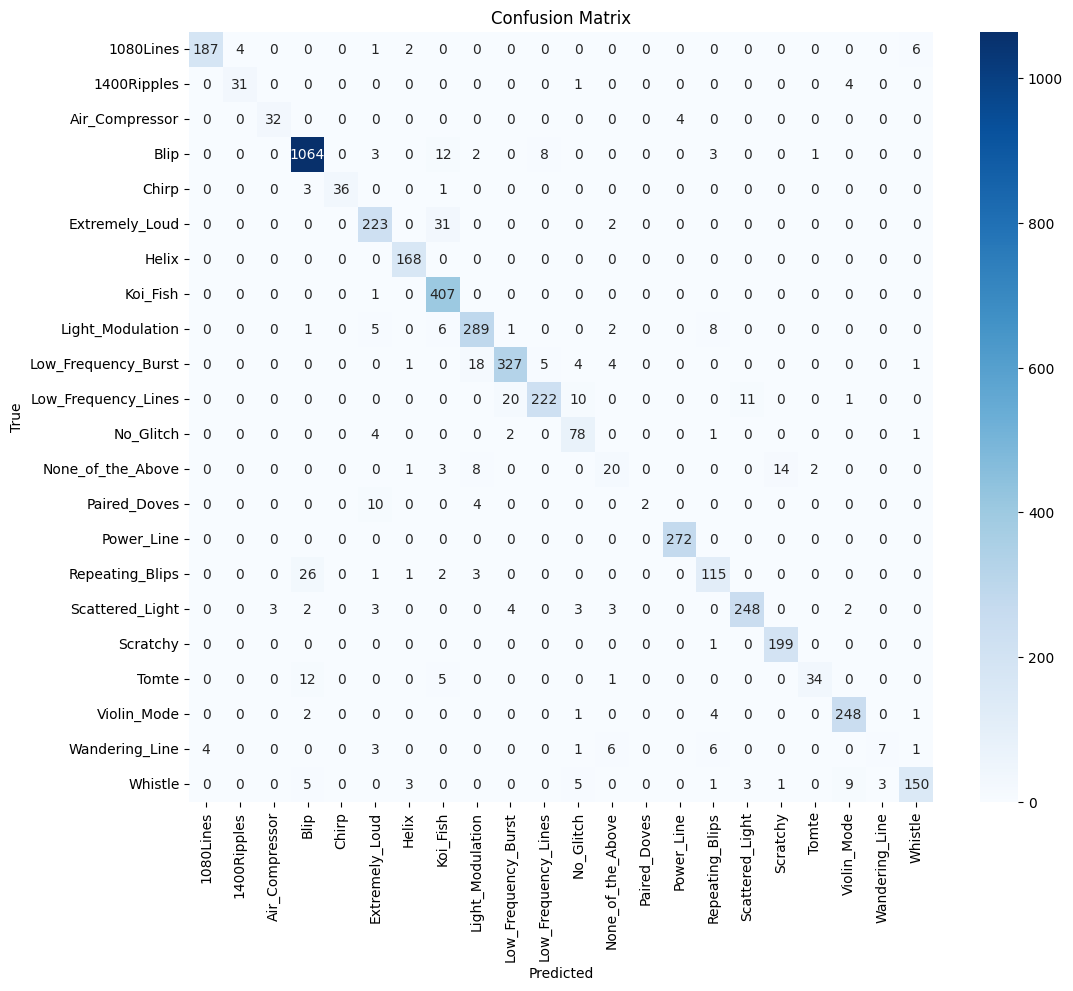

 Overall Test Accuracy: 0.9221


In [ ]:
predictions = model.predict(test_generator, steps=test_size, verbose=1)
y_pred = np.argmax(predictions, axis=1)
y_true = test_generator.classes

# Confusion matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes_list, yticklabels=classes_list)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# Overall accuracy
acc = accuracy_score(y_true, y_pred)
print(f" Overall Test Accuracy: {acc:.4f}")


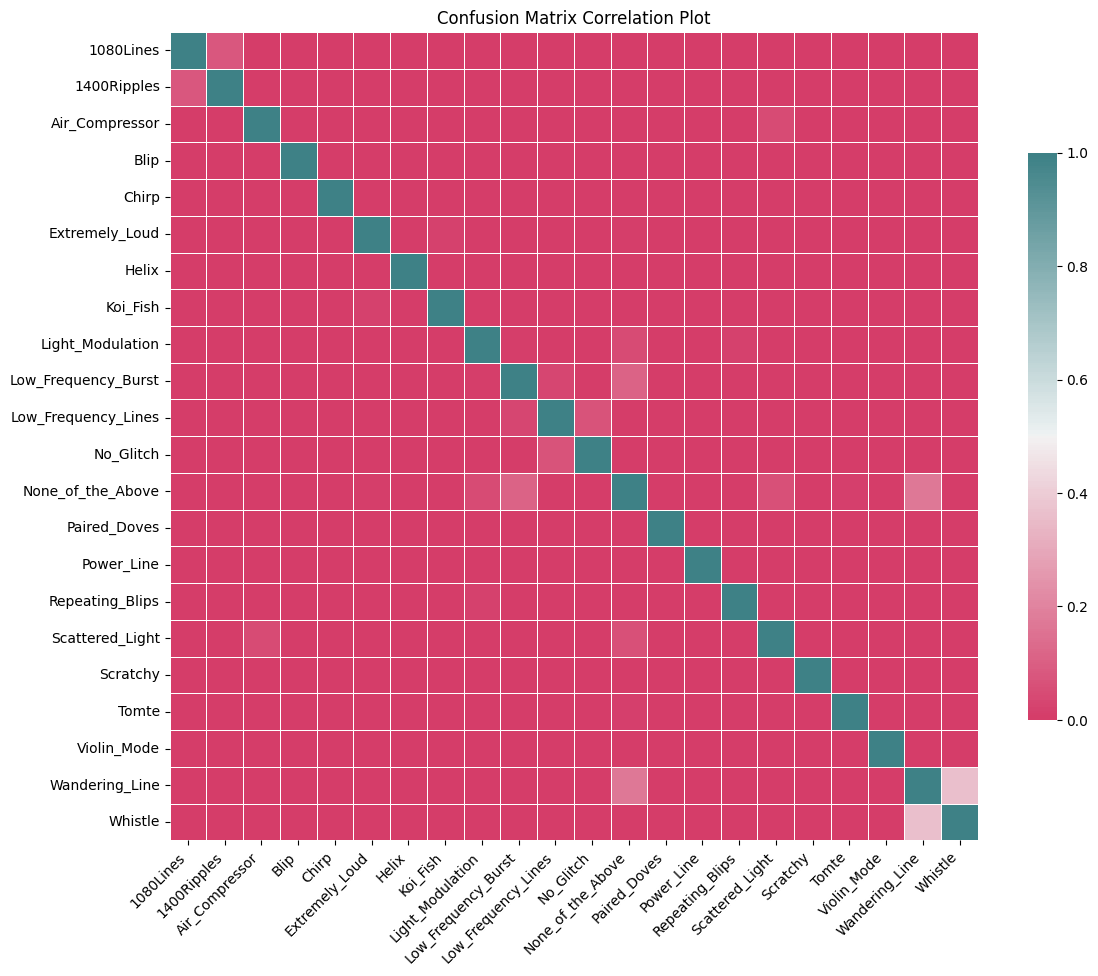

In [ ]:
# Create a labeled confusion matrix dataframe
cm_df = pd.DataFrame(cm, index=classes_list, columns=classes_list)

# Add signal/class names as a column (optional, if needed for export)
cm_df['signal'] = classes_list

# Plot correlation heatmap
import seaborn as sns

plt.figure(figsize=(12, 12))
corr = cm_df.drop(columns='signal').corr()

ax = sns.heatmap(
    corr,
    vmin=0, vmax=1, center=0.5,
    cmap=sns.diverging_palette(0, 200, n=200),
    square=True,
    linewidths=.5,
    cbar_kws={"shrink": 0.5}
)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)
plt.title("Confusion Matrix Correlation Plot")
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

acc = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='macro')
recall = recall_score(y_true, y_pred, average='macro')
f1 = f1_score(y_true, y_pred, average='macro')

print("Evaluation Metrics Summary")
print(f" Accuracy       : {acc:.4f}")
print(f" Precision (avg): {precision:.4f}")
print(f" Recall (avg)   : {recall:.4f}")
print(f" F1 Score (avg) : {f1:.4f}")


Evaluation Metrics Summary
 Accuracy       : 0.9221
 Precision (avg): 0.8939
 Recall (avg)   : 0.8161
 F1 Score (avg) : 0.8323


In [ ]:
from sklearn.metrics import roc_auc_score

# Binarize true labels and predictions
from sklearn.preprocessing import label_binarize
y_true_bin = label_binarize(y_true, classes=range(len(classes_list)))

# Already predicted probabilities: predictions
try:
    auc_score = roc_auc_score(y_true_bin, predictions, average='macro', multi_class='ovr')
    print(f" Macro-average AUC-ROC: {auc_score:.4f}")
except ValueError:
    print(" AUC-ROC could not be computed (check class coverage in test set).")


 Macro-average AUC-ROC: 0.9940


In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix

def compute_confusion_entropy(y_true, y_pred, num_classes):
    cm = confusion_matrix(y_true, y_pred, labels=np.arange(num_classes))
    cm = cm.astype(np.float64)
    N = cm.shape[0]
    total = cm.sum()
    cen = 0.0

    for i in range(N):
        row_sum = cm[i, :].sum()
        if row_sum == 0:
            continue
        for j in range(N):
            if i == j:
                continue
            pij = cm[i][j] / row_sum
            pji = cm[j][i] / cm[j].sum() if cm[j].sum() > 0 else 0
            if pij > 0 and pji > 0:
                cen += pij * np.log2((2 * pij) / (pij + pji))

    cen = cen / N
    return cen
cen_score = compute_confusion_entropy(y_true, y_pred, num_classes=len(classes_list))
print(f" Confusion Entropy (CEN): {cen_score:.4f}")



 Confusion Entropy (CEN): 0.0338


In [ ]:
def compute_far(y_true, y_pred, class_names, negative_class="No_Glitch"):
    idx = class_names.index(negative_class)

    # False Positives = predicted as class X, but true was No_Glitch
    false_positives = sum((y_pred == idx) & (y_true != idx))
    total_predictions = len(y_true)

    far = false_positives / total_predictions
    return far
far_score = compute_far(y_true, y_pred, classes_list, negative_class="No_Glitch")
print(f" False Alarm Rate (FAR for 'No_Glitch'): {far_score:.4f}")


 False Alarm Rate (FAR for 'No_Glitch'): 0.0053


In [ ]:
from sklearn.metrics import recall_score

def compute_detection_efficiency(y_true, y_pred, class_names):
    recalls = recall_score(y_true, y_pred, average=None)
    print(" Detection Efficiency (per class):")
    for cls, r in zip(class_names, recalls):
        print(f"   🔹 {cls:20s}: {r:.4f}")
compute_detection_efficiency(y_true, y_pred, classes_list)

 Detection Efficiency (per class):
   🔹 1080Lines           : 0.9350
   🔹 1400Ripples         : 0.8611
   🔹 Air_Compressor      : 0.8889
   🔹 Blip                : 0.9735
   🔹 Chirp               : 0.9000
   🔹 Extremely_Loud      : 0.8711
   🔹 Helix               : 1.0000
   🔹 Koi_Fish            : 0.9975
   🔹 Light_Modulation    : 0.9263
   🔹 Low_Frequency_Burst : 0.9083
   🔹 Low_Frequency_Lines : 0.8409
   🔹 No_Glitch           : 0.9070
   🔹 None_of_the_Above   : 0.4167
   🔹 Paired_Doves        : 0.1250
   🔹 Power_Line          : 1.0000
   🔹 Repeating_Blips     : 0.7770
   🔹 Scattered_Light     : 0.9254
   🔹 Scratchy            : 0.9950
   🔹 Tomte               : 0.6538
   🔹 Violin_Mode         : 0.9688
   🔹 Wandering_Line      : 0.2500
   🔹 Whistle             : 0.8333


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step
 True Label     : Blip
 Predicted Label: Blip


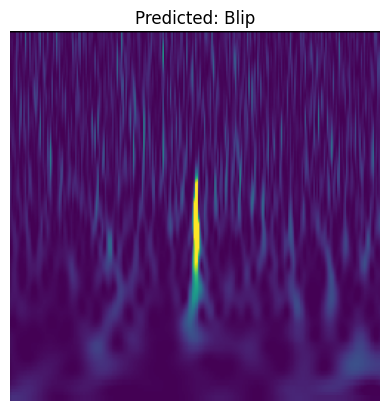

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
import os

# Load the trained model
model_path = '/content/drive/MyDrive/Classifier/real_only_model.h5'
model = load_model(model_path)

# Set the class list (from training folder)
train_dir = '/content/drive/MyDrive/GRAVITY SPY DATASET/train/train'
class_names = sorted(os.listdir(train_dir))

# Choose a test image (include class name in path)
test_image_path = '/content/drive/MyDrive/GRAVITY SPY DATASET/test/test/Blip/H1_5uen6yDWiF_spectrogram_1.0.png'

# Extract true label from folder name
true_label = os.path.basename(os.path.dirname(test_image_path))

# Load and preprocess the image
img_dim = 250
img = image.load_img(test_image_path, target_size=(img_dim, img_dim))
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

# Predict
pred = model.predict(img_array)
predicted_class = class_names[np.argmax(pred)]

# Print results
print(f" True Label     : {true_label}")
print(f" Predicted Label: {predicted_class}")

# Show image with predicted label
plt.imshow(img)
plt.title(f"Predicted: {predicted_class}")
plt.axis('off')
plt.show()
